# **HOMEWORK 4** 

**VIGNESH PRABHAKAR**<br>
**USC ID:** : 4024890667


Mounted the google drive into google colab runtime 

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# (1)(a)

Loaded the communities.data file as a dataframe and replaced the ? with NaN in the dataframe . Specified the column names for each variable in the dataframe

In [0]:
import pandas as pd
df= pd.read_csv('/gdrive/My Drive/Homeworks/homework4/communities.data',na_values="?",header=None)
df.columns=["state ","county ","community ","communityname","fold ","population ","householdsize ","racepctblack ","racePctWhite ","racePctAsian ","racePctHisp ","agePct12t21 ","agePct12t29 ","agePct16t24 ","agePct65up ","numbUrban ","pctUrban ","medIncome ","pctWWage ","pctWFarmSelf ","pctWInvInc ","pctWSocSec ","pctWPubAsst ","pctWRetire ","medFamInc ","perCapInc ","whitePerCap ","blackPerCap ","indianPerCap ","AsianPerCap ","OtherPerCap ","HispPerCap ","NumUnderPov ","PctPopUnderPov ","PctLess9thGrade ","PctNotHSGrad ","PctBSorMore ","PctUnemployed ","PctEmploy ","PctEmplManu ","PctEmplProfServ ","PctOccupManu ","PctOccupMgmtProf ","MalePctDivorce ","MalePctNevMarr ","FemalePctDiv ","TotalPctDiv ","PersPerFam","PctFam2Par ","PctKids2Par ","PctYoungKids2Par ","PctTeen2Par ","PctWorkMomYoungKids ","PctWorkMom ","NumIlleg ","PctIlleg ","NumImmig ","PctImmigRecent ","PctImmigRec5 ","PctImmigRec8 ","PctImmigRec10 ","PctRecentImmig ","PctRecImmig5 ","PctRecImmig8 ","PctRecImmig10 ","PctSpeakEnglOnly ","PctNotSpeakEnglWell ","PctLargHouseFam ","PctLargHouseOccup ","PersPerOccupHous ","PersPerOwnOccHous ","PersPerRentOccHous ","PctPersOwnOccup ","PctPersDenseHous ","PctHousLess3BR ","MedNumBR ","HousVacant ","PctHousOccup ","PctHousOwnOcc ","PctVacantBoarded ","PctVacMore6Mos ","MedYrHousBuilt ","PctHousNoPhone ","PctWOFullPlumb ","OwnOccLowQuart ","OwnOccMedVal ","OwnOccHiQuart ","RentLowQ ","RentMedian ","RentHighQ ","MedRent ","MedRentPctHousInc ","MedOwnCostPctInc ","MedOwnCostPctIncNoMtg ","NumInShelters ","NumStreet ","PctForeignBorn ","PctBornSameState ","PctSameHouse85 ","PctSameCity85 ","PctSameState85 ","LemasSwornFT ","LemasSwFTPerPop ","LemasSwFTFieldOps ","LemasSwFTFieldPerPop ","LemasTotalReq ","LemasTotReqPerPop ","PolicReqPerOffic ","PolicPerPop ","RacialMatchCommPol ","PctPolicWhite ","PctPolicBlack ","PctPolicHisp ","PctPolicAsian ","PctPolicMinor ","OfficAssgnDrugUnits ","NumKindsDrugsSeiz ","PolicAveOTWorked ","LandArea ","PopDens ","PctUsePubTrans ","PolicCars ","PolicOperBudg ","LemasPctPolicOnPatr ","LemasGangUnitDeploy ","LemasPctOfficDrugUn ","PolicBudgPerPop ","ViolentCrimesPerPop "]
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


# (1)(b)
Removing the non-predictive features from the dataframe and checking the shape

In [0]:
df=df.iloc[:,5:len(df)]
df.shape

(1994, 123)

In [0]:
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Iterative imputer has been utilised in order to fill in the missing values through expectation maximization .We initially impute the missing  values with the average of the particular feature and then perform expectation maximization by fitting a linear model with the previously imputed values in order to predict better set of possible values for missing instances through the regression model . Since we cannot remove a lot of features due to significance in predictive results but we also have missing values ,this is the way to go about it 

In [0]:
col_names=df.columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp=IterativeImputer(sample_posterior=True)
df=pd.DataFrame(imp.fit_transform(df))
df.columns=col_names

Train test split 

The first 1495 rows of data is used as the training set and the rest as the test set

In [0]:
train_df_x = df.iloc[0:1495,0:122].values
train_df_y = df.iloc[0:1495,122].values
test_df_x=df.iloc[1495:len(df),0:122].values
test_df_y=df.iloc[1495:len(df),122].values

print(train_df_x.shape)
print(test_df_x.shape)
print(train_df_y.shape)
print(test_df_y.shape)

(1495, 122)
(499, 122)
(1495,)
(499,)


# Correlation Matrix for the features

The correlation matrix for the predictors has been plotted below for the entire dataset

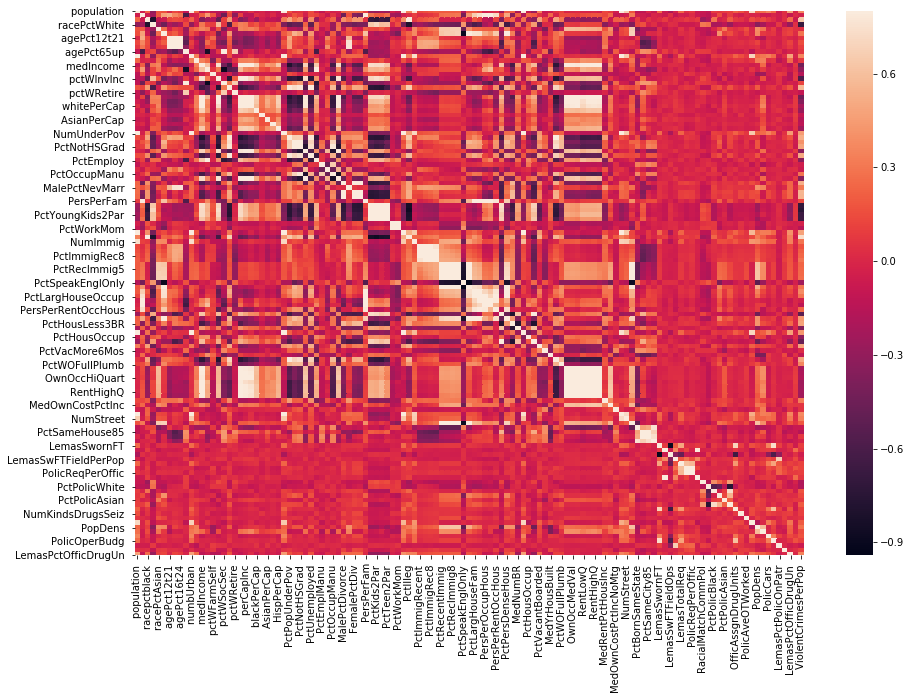

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corr_matrix, vmax = 0.8)
plt.show()


# (1)(d)

Coefficient of Variation (CV) for each feature, where CV = s/m in
which s is sample standard deviation and m is sample mean.

Utilised variation library from scipy.stats for the same

In [0]:
from scipy.stats import variation  
import numpy as np 

lst=[]
for i in range(0,len(df.columns)):
    arr=df.iloc[:,i].values
    lst.append(variation(arr, axis = 0))
    

In [0]:
lst2=lst
lst1=np.reshape(lst, (-1, 1)).T
feature_names=["population ","householdsize ","racepctblack ","racePctWhite ","racePctAsian ","racePctHisp ","agePct12t21 ","agePct12t29 ","agePct16t24 ","agePct65up ","numbUrban ","pctUrban ","medIncome ","pctWWage ","pctWFarmSelf ","pctWInvInc ","pctWSocSec ","pctWPubAsst ","pctWRetire ","medFamInc ","perCapInc ","whitePerCap ","blackPerCap ","indianPerCap ","AsianPerCap ","OtherPerCap ","HispPerCap ","NumUnderPov ","PctPopUnderPov ","PctLess9thGrade ","PctNotHSGrad ","PctBSorMore ","PctUnemployed ","PctEmploy ","PctEmplManu ","PctEmplProfServ ","PctOccupManu ","PctOccupMgmtProf ","MalePctDivorce ","MalePctNevMarr ","FemalePctDiv ","TotalPctDiv ","PersPerFam","PctFam2Par ","PctKids2Par ","PctYoungKids2Par ","PctTeen2Par ","PctWorkMomYoungKids ","PctWorkMom ","NumIlleg ","PctIlleg ","NumImmig ","PctImmigRecent ","PctImmigRec5 ","PctImmigRec8 ","PctImmigRec10 ","PctRecentImmig ","PctRecImmig5 ","PctRecImmig8 ","PctRecImmig10 ","PctSpeakEnglOnly ","PctNotSpeakEnglWell ","PctLargHouseFam ","PctLargHouseOccup ","PersPerOccupHous ","PersPerOwnOccHous ","PersPerRentOccHous ","PctPersOwnOccup ","PctPersDenseHous ","PctHousLess3BR ","MedNumBR ","HousVacant ","PctHousOccup ","PctHousOwnOcc ","PctVacantBoarded ","PctVacMore6Mos ","MedYrHousBuilt ","PctHousNoPhone ","PctWOFullPlumb ","OwnOccLowQuart ","OwnOccMedVal ","OwnOccHiQuart ","RentLowQ ","RentMedian ","RentHighQ ","MedRent ","MedRentPctHousInc ","MedOwnCostPctInc ","MedOwnCostPctIncNoMtg ","NumInShelters ","NumStreet ","PctForeignBorn ","PctBornSameState ","PctSameHouse85 ","PctSameCity85 ","PctSameState85 ","LemasSwornFT ","LemasSwFTPerPop ","LemasSwFTFieldOps ","LemasSwFTFieldPerPop ","LemasTotalReq ","LemasTotReqPerPop ","PolicReqPerOffic ","PolicPerPop ","RacialMatchCommPol ","PctPolicWhite ","PctPolicBlack ","PctPolicHisp ","PctPolicAsian ","PctPolicMinor ","OfficAssgnDrugUnits ","NumKindsDrugsSeiz ","PolicAveOTWorked ","LandArea ","PopDens ","PctUsePubTrans ","PolicCars ","PolicOperBudg ","LemasPctPolicOnPatr ","LemasGangUnitDeploy ","LemasPctOfficDrugUn ","PolicBudgPerPop ","ViolentCrimesPerPop "]
coeff_variation=pd.DataFrame(lst1,columns=feature_names)
coeff_variation

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,2.20295,0.35321,1.410567,0.3237,1.358821,1.613873,0.365748,0.29062,0.495036,0.423336,2.001242,0.638689,0.579608,0.327628,0.699855,0.35915,0.36842,0.698855,0.349551,0.5276,0.545497,0.507425,0.589321,0.809482,0.606042,0.671091,0.473841,2.304392,0.753791,0.675431,0.528154,0.578256,0.555993,0.34724,0.510452,0.398126,0.508334,0.422,0.395484,0.40371,...,0.561743,0.586867,0.555453,0.345743,0.416287,0.476814,3.484607,4.406597,1.072022,0.33549,0.338859,0.320025,0.304163,7.200266,0.309384,0.210003,0.705366,14.614606,2.263626,2.450742,0.308711,0.591143,0.548389,3.878621,3.212529,6.527767,2.630625,-31.884491,0.50253,0.978297,1.677611,0.871968,1.416317,3.681357,4.660799,1.041777,1.206993,2.554625,1.171337,0.978769


# (1)(e)

Picked the floor(√128) features with highest CV , and make scatter plots and box plots for them.

In [0]:
import math
import heapq
rt=np.floor(math.sqrt(len(df.columns)))
lst2.sort(reverse=True)
print(lst2[0:11])
coeff_variation.sort_values(by=0, ascending=False, axis=1)


[14.61460572339292, 7.200265682116811, 6.527767359394274, 4.660798948902504, 4.406597060924217, 3.8786212923725576, 3.6813574639615303, 3.484607166824059, 3.2125293374987187, 2.993445553811211, 2.899769766465969]


,LemasTotalReq,LemasSwornFT,PctPolicAsian,PolicOperBudg,NumStreet,PctPolicBlack,PolicCars,NumInShelters,PctPolicHisp,NumIlleg,NumImmig,PctPolicMinor,LemasPctOfficDrugUn,PolicReqPerOffic,NumUnderPov,LemasTotReqPerPop,population,numbUrban,HousVacant,LandArea,racePctHisp,PctNotSpeakEnglWell,PctUsePubTrans,racepctblack,racePctAsian,PctRecentImmig,PctRecImmig5,PctRecImmig10,PctRecImmig8,LemasGangUnitDeploy,PolicBudgPerPop,PctPersDenseHous,PctForeignBorn,PctVacantBoarded,LemasPctPolicOnPatr,ViolentCrimesPerPop,PolicAveOTWorked,PctIlleg,PctHousNoPhone,OwnOccMedVal,...,agePct65up,PctOccupMgmtProf,MedOwnCostPctInc,MalePctNevMarr,PctEmplProfServ,MalePctDivorce,TotalPctDiv,pctWSocSec,PersPerOccupHous,agePct12t21,FemalePctDiv,pctWInvInc,householdsize,PctPersOwnOccup,pctWRetire,PctHousLess3BR,PctEmploy,MedRentPctHousInc,PctSameHouse85,PctHousOwnOcc,PctWorkMomYoungKids,PctBornSameState,PctWorkMom,PctKids2Par,PctFam2Par,PctYoungKids2Par,PctTeen2Par,pctWWage,racePctWhite,PctSameCity85,PersPerOwnOccHous,PersPerFam,LemasSwFTPerPop,PolicPerPop,PctSameState85,agePct12t29,PctSpeakEnglOnly,PctHousOccup,LemasSwFTFieldOps,OfficAssgnDrugUnits
0,14.614606,7.200266,6.527767,4.660799,4.406597,3.878621,3.681357,3.484607,3.212529,2.993446,2.89977,2.630625,2.554625,2.450742,2.304392,2.263626,2.20295,2.001242,1.958288,1.677611,1.613873,1.458701,1.416317,1.410567,1.358821,1.299774,1.297306,1.283712,1.280912,1.206993,1.171337,1.126917,1.072022,1.064475,1.041777,0.978769,0.978297,0.919572,0.917981,0.878529,...,0.423336,0.422,0.416287,0.40371,0.398126,0.395484,0.371375,0.36842,0.366822,0.365748,0.359183,0.35915,0.35321,0.350228,0.349551,0.348283,0.34724,0.345743,0.338859,0.337456,0.336164,0.33549,0.332639,0.332393,0.330528,0.329343,0.328469,0.327628,0.3237,0.320025,0.319327,0.316875,0.309384,0.308711,0.304163,0.29062,0.288601,0.269579,0.210003,-31.884491


Scatterplot for the floor(root(128)) features with highest CV

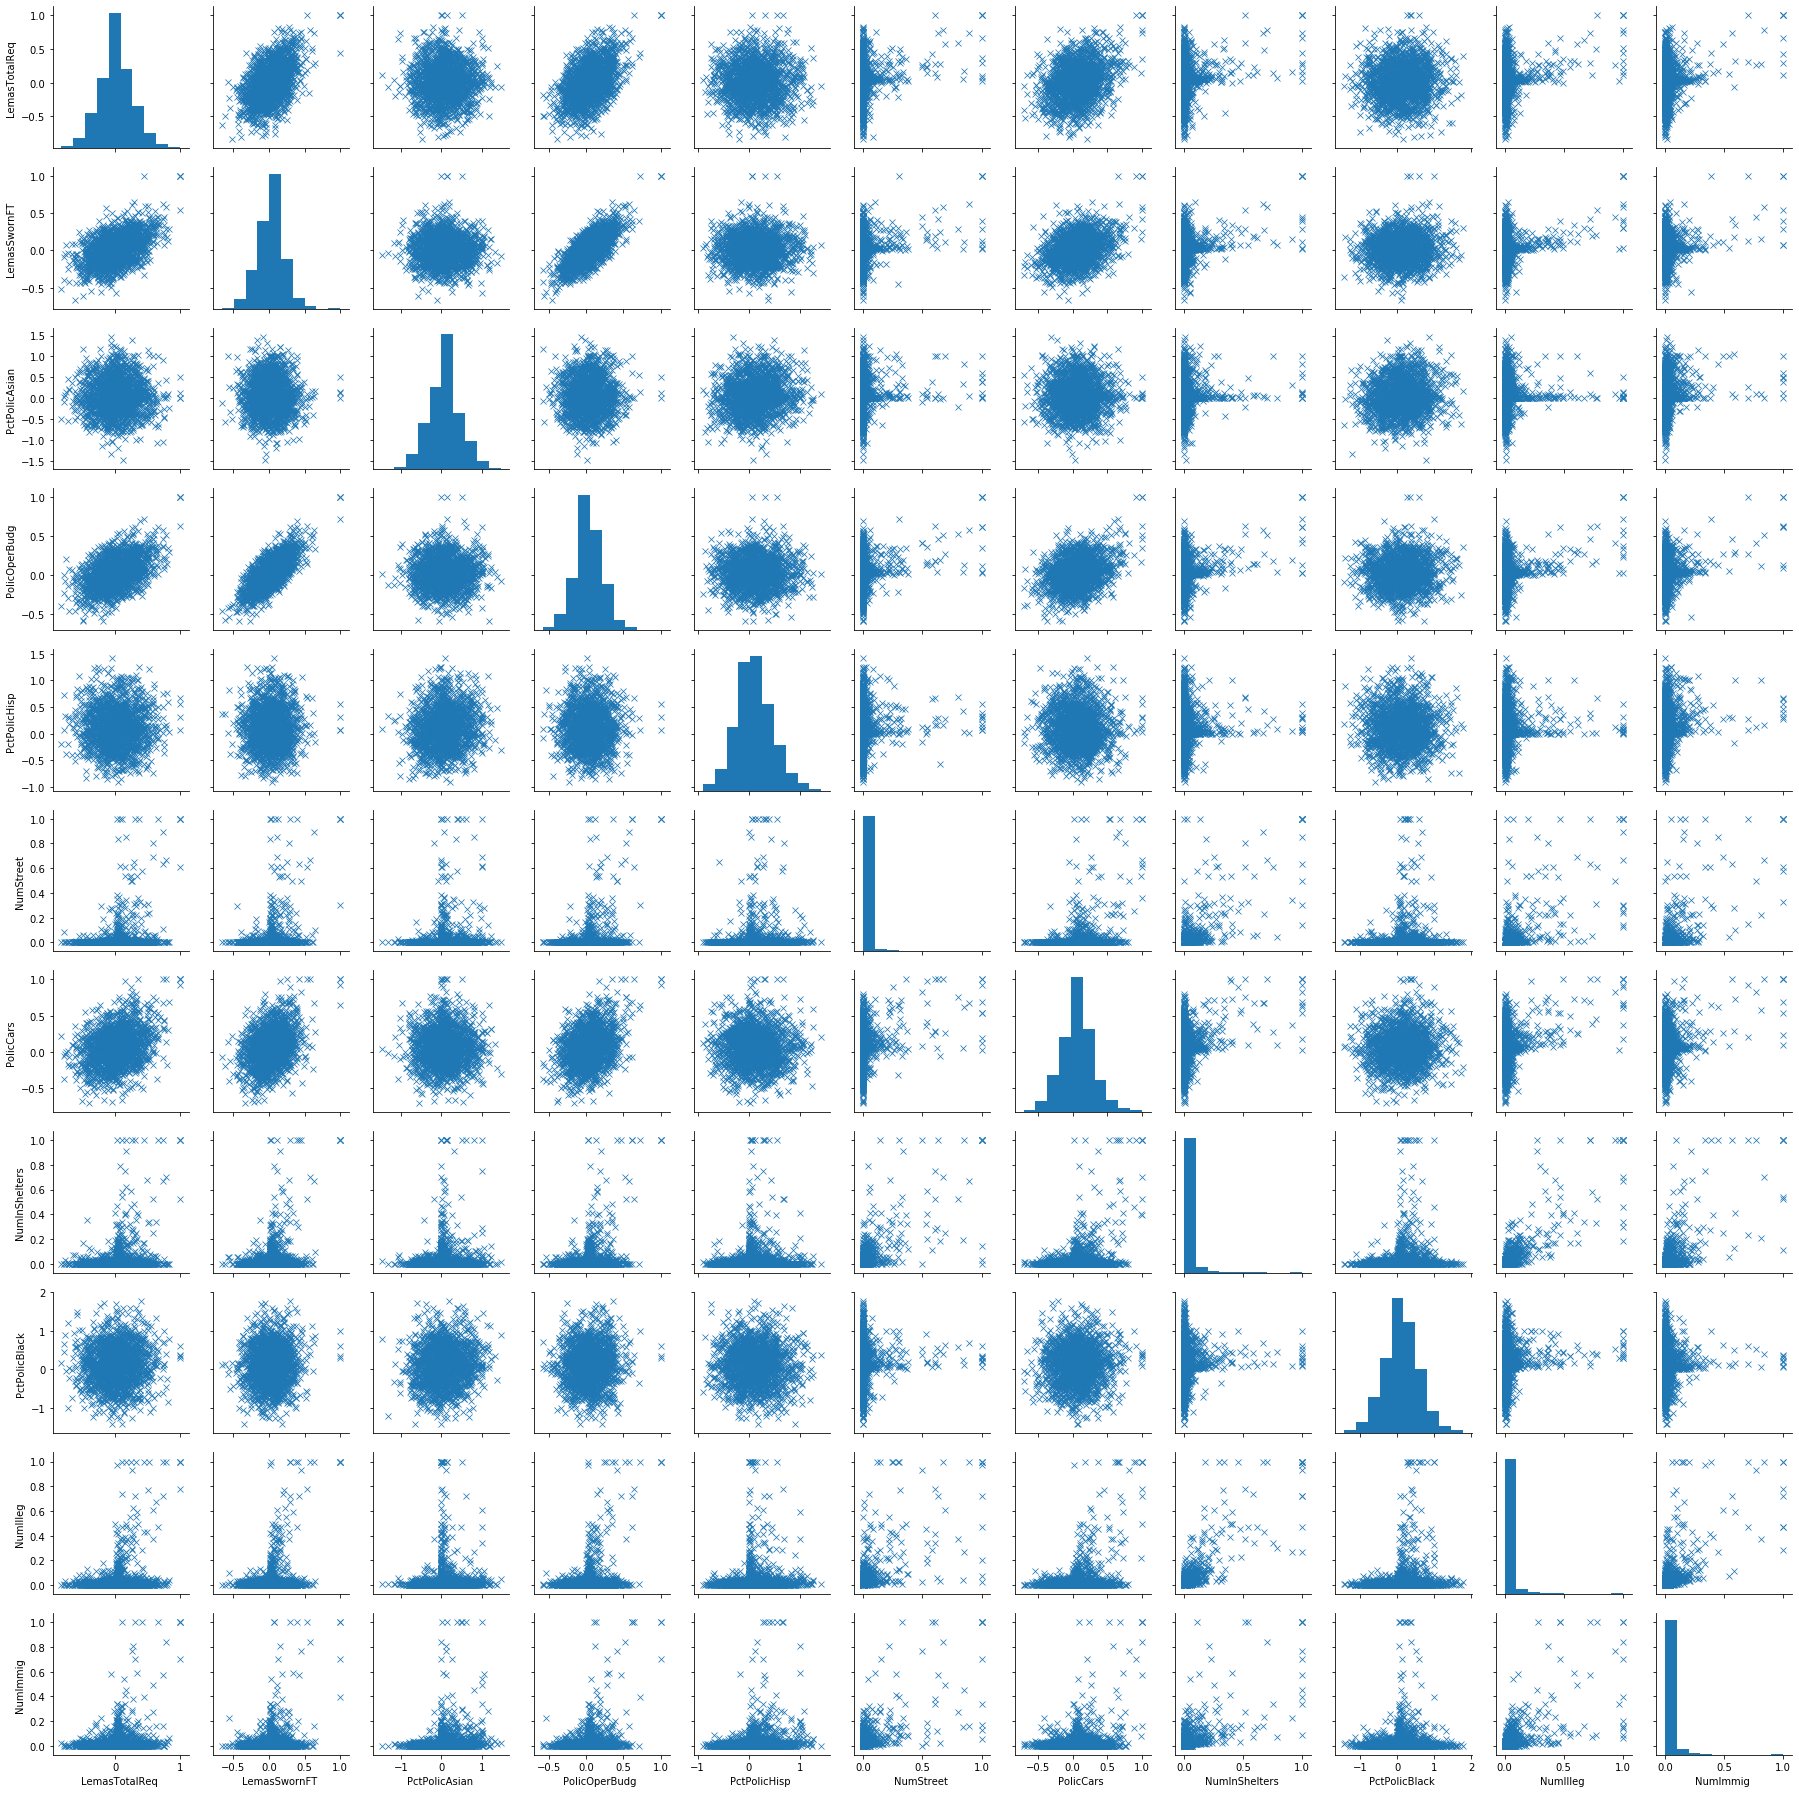

In [0]:
import seaborn as sns

cols=['LemasTotalReq ',	'LemasSwornFT '	,'PctPolicAsian '	,'PolicOperBudg ','PctPolicHisp ','NumStreet ',	'PolicCars ',	'NumInShelters '	,'PctPolicBlack '	,'NumIlleg ',	'NumImmig ']
plot_cols=df[cols]
g=sns.pairplot(plot_cols,markers='x')
g.fig.set_size_inches(25,25)




Boxplots for the floor(root(128)) features with highest CV

In [0]:
col1=df['LemasTotalReq ']	
col2=df['LemasSwornFT ']	
col3=df['PctPolicAsian ']	
col4=df['PolicOperBudg ']
col5=df['NumStreet ']
col6=df['PolicCars ']
col7=df['NumInShelters ']	
col8=df['PctPolicHisp ']	
col9=df['PctPolicBlack ']	
col10=df['NumIlleg ']	
col11=df['NumImmig ']


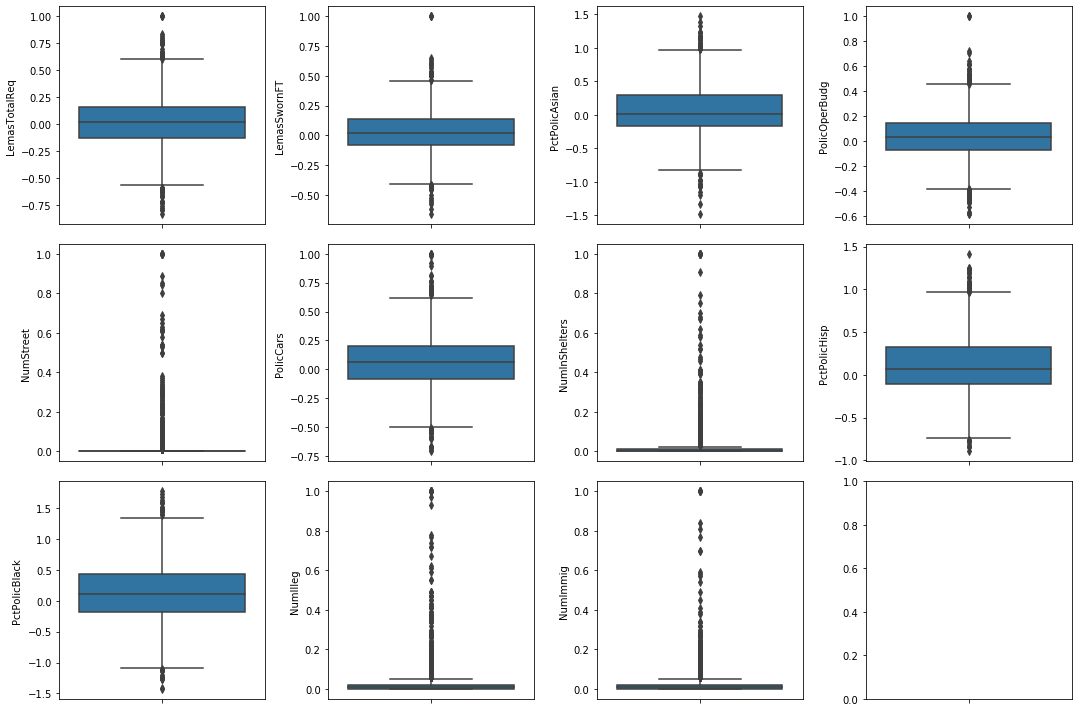

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

bx,bxplts  = plt.subplots(3, 4,sharex=True,sharey=False)

bxplts=bxplts.flatten()
bx1=sn.boxplot(y=col1,ax=bxplts[0])
bx2=sn.boxplot(y=col2,ax=bxplts[1])
bx3=sn.boxplot(y=col3,ax=bxplts[2])
bx4=sn.boxplot(y=col4,ax=bxplts[3])
bx5=sn.boxplot(y=col5,ax=bxplts[4])
bx6=sn.boxplot(y=col6,ax=bxplts[5])
bx7=sn.boxplot(y=col7,ax=bxplts[6])
bx8=sn.boxplot(y=col8,ax=bxplts[7])
bx9=sn.boxplot(y=col9,ax=bxplts[8])
bx10=sn.boxplot(y=col10,ax=bxplts[9])
bx11=sn.boxplot(y=col11,ax=bxplts[10])

bx.set_figheight(10)
bx.set_figwidth(15)

bx.tight_layout()

plt.show()

# (1)(f)

Fit an ordinary least squares regression model with the training data and performed predictions on the test data in order to compute the test MSE for the OLS regression model on our data. <br>

Test MSE obtained : 0.017988732168980597

In [0]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error 

mdl = sm.OLS(train_df_y, train_df_x).fit()
predictions = mdl.predict(test_df_x)

err_mse_lr = mean_squared_error(test_df_y,predictions)

print(err_mse_lr)

df_predvsact = pd.DataFrame({'Actual value': test_df_y, 'Predicted value': predictions})

print(df_predvsact)


0.017988732168980597
     Actual value  Predicted value
0            0.12         0.165599
1            0.11        -0.014544
2            0.12         0.209977
3            0.06         0.091561
4            0.12         0.155106
..            ...              ...
494          0.09         0.120568
495          0.45         0.514811
496          0.23         0.407998
497          0.19         0.167504
498          0.48         0.373459

[499 rows x 2 columns]


# (1)(g)

Fit a ridge regression model with the training data , obtained the best value for lambda (penalty term) corresponding to minimal cross validation error and then performed predictions on the test data in order to compute the test MSE for the ridge regression model on our data.<br>

Best Value for lambda : 10

Test MSE obtained : 0.017617474



In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
import math

val_acc=[]
alpha_vals=[]
mse=[]
kcv = KFold(n_splits=5, random_state=None, shuffle=False)


for tr,va in kcv.split(train_df_x,train_df_y):
        alp= [10**k for k in range(-3,3,1) ]
        train_x = train_df_x[tr.tolist(),:] 
        val_x   = train_df_x[va.tolist(),:]
        
        train_y = train_df_y[tr.tolist()] 
        val_y   =  train_df_y[va.tolist()]
    
            
        mdl = RidgeCV(alphas=alp)
        mdl = mdl.fit(train_x, train_y)
        actual_y=val_y
        
        predicted_y = mdl.predict(val_x)
        
        alpha_vals.append(mdl.alpha_)
        val_acc.append(mdl.score(val_x,val_y))
        mse.append(mean_squared_error(actual_y,predicted_y))
       
        
        


Best value of lambda chosen from the below table is 10

In [0]:
lambda_selector = pd.DataFrame({"Optimal lambda":alpha_vals ,"Valiation-Accuracy":val_acc,"MSE":mse})
lambda_selector

,Optimal lambda,Valiation-Accuracy,MSE
0,1.0,0.609715,0.021524
1,1.0,0.642706,0.021905
2,1.0,0.644380,0.020765
3,10.0,0.719624,0.015888
4,1.0,0.679194,0.016193


Retraining the ridge regression model after performing cross validation with the chosen lambda corresponding to least cross validation MSE  

In [0]:
from sklearn.linear_model import Ridge

mdl = Ridge(alpha=10.0)
mdl.fit(train_df_x, train_df_y)
actual_y=test_df_y
predicted_y=mdl.predict(test_df_x)
train_acc_ridge=mdl.score(train_df_x,train_df_y)

test_acc_ridge=mdl.score(test_df_x,test_df_y)
test_mse_ridge=mean_squared_error(actual_y,predicted_y)

print(train_acc_ridge)
print(test_acc_ridge)
print(test_mse_ridge)

0.6875688598312757
0.6295371092110689
0.017617474125619054


# (1)(h)

Fit a lasso regression model with the training data , obtained the best value for lambda (penalty term) corresponding to minimal cross validation error and then performed predictions on the test data in order to compute the test MSE for the lasso regression model on our data.<br>

Best Value for lambda : 0.001

Test MSE obtained : 0.01765454025455302


In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
import math

val_acc=[]
alpha_vals=[]
mse=[]
kcv = KFold(n_splits=5, random_state=None, shuffle=False)


for tr,va in kcv.split(train_df_x,train_df_y):
        alp= [10**k for k in range(-3,3,1) ]
        train_x = train_df_x[tr.tolist(),:] 
        val_x   = train_df_x[va.tolist(),:]
        
        train_y = train_df_y[tr.tolist()] 
        val_y   =  train_df_y[va.tolist()]
    
            
        mdl = LassoCV(alphas=alp)
        mdl = mdl.fit(train_x, train_y)
        actual_y=val_y
        
        predicted_y = mdl.predict(val_x)
        
        alpha_vals.append(mdl.alpha_)
        val_acc.append(mdl.score(val_x,val_y))
        mse.append(mean_squared_error(actual_y,predicted_y))
       

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

Best value of lambda chosen from the below table is 0.001

In [0]:
lambda_selector = pd.DataFrame({"Optimal lambda":alpha_vals ,"Valiation-Accuracy":val_acc,"MSE":mse})
lambda_selector

,Optimal lambda,Valiation-Accuracy,MSE
0,0.001,0.590770,0.022569
1,0.001,0.628469,0.022778
2,0.001,0.650691,0.020397
3,0.001,0.723107,0.015691
4,0.001,0.685799,0.015859


Retraining the lasso regression model after performing cross validation with the chosen lambda corresponding to least cross validation MSE

In [0]:
from sklearn.linear_model import Lasso

mdl = Lasso(alpha=0.001)
mdl.fit(train_df_x, train_df_y)
actual_y=test_df_y
predicted_y=mdl.predict(test_df_x)
train_acc_lasso=mdl.score(train_df_x,train_df_y)

test_acc_lasso=mdl.score(test_df_x,test_df_y)
test_mse_lasso=mean_squared_error(actual_y,predicted_y)

print(mdl.sparse_coef_)
print(train_acc_lasso)
print(test_acc_lasso)
print(test_mse_lasso)

  (0, 2)	0.20271265369072303
  (0, 3)	-0.016306035668841277
  (0, 11)	0.0404666370060995
  (0, 17)	0.02907789726638834
  (0, 24)	0.010274577444597994
  (0, 38)	0.13543165900803536
  (0, 44)	-0.2098250060166508
  (0, 45)	-0.010953151195067406
  (0, 48)	-0.04848267392998222
  (0, 50)	0.1588533573663748
  (0, 59)	0.00900416962725085
  (0, 68)	0.15033074328899834
  (0, 69)	0.001197987168352741
  (0, 71)	0.08556314849188046
  (0, 72)	-0.046170320099015186
  (0, 74)	0.03279472257971203
  (0, 86)	0.02282481011830894
  (0, 88)	-0.011664431298219946
  (0, 90)	0.06814729613487776
  (0, 91)	0.028255977825680408
  (0, 94)	0.01130617257127085
  (0, 101)	0.024264304328268368
  (0, 108)	0.007349099978594912
  (0, 109)	0.0037716540088309314
  (0, 116)	0.031161752929878123
  (0, 118)	-0.004041328884081582
  (0, 119)	0.008510503808825471
  (0, 120)	0.005889319110017491
  (0, 121)	-0.0018049835086612195
0.6711620397610747
0.6287576770871832
0.01765454025455302


The list of variables selected by the model

In [0]:
col_names[[2,3,7,11,17,24,38,44,45,48,50,59,68,69,71,72,74,86,88,90,91,94,101,108,109,116,118,119,120,121]]

Index(['racepctblack ', 'racePctWhite ', 'agePct12t29 ', 'pctUrban ',
       'pctWPubAsst ', 'AsianPerCap ', 'MalePctDivorce ', 'PctKids2Par ',
       'PctYoungKids2Par ', 'PctWorkMom ', 'PctIlleg ', 'PctRecImmig10 ',
       'PctPersDenseHous ', 'PctHousLess3BR ', 'HousVacant ', 'PctHousOccup ',
       'PctVacantBoarded ', 'MedRentPctHousInc ', 'MedOwnCostPctIncNoMtg ',
       'NumStreet ', 'PctForeignBorn ', 'PctSameCity85 ', 'LemasTotReqPerPop ',
       'PctPolicAsian ', 'PctPolicMinor ', 'PolicCars ',
       'LemasPctPolicOnPatr ', 'LemasGangUnitDeploy ', 'LemasPctOfficDrugUn ',
       'PolicBudgPerPop '],
      dtype='object')

Fit a lasso regression model with standardized training data , obtained the best value for lambda (penalty term) corresponding to minimal cross validation error and then performed predictions on the test data in order to compute the test MSE for the lasso regression model on our data.<br>

Best Value for lambda : 0.010

Test MSE obtained : 0.01736131090296033


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_df_x_std = sc.fit_transform(train_df_x)
test_df_x_std = sc.transform(test_df_x)

import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
import math

val_acc_sc=[]
alpha_vals_sc=[]
mse_sc=[]
kcv = KFold(n_splits=5, random_state=None, shuffle=False)


for tr,va in kcv.split(train_df_x_std,train_df_y):
        alp= [10**k for k in range(-3,3,1) ]
        train_x = train_df_x_std[tr.tolist(),:] 
        val_x   = train_df_x_std[va.tolist(),:]
        
        train_y = train_df_y[tr.tolist()] 
        val_y   =  train_df_y[va.tolist()]
    
            
        mdl = LassoCV(alphas=alp)
        mdl = mdl.fit(train_x, train_y)
        actual_y=val_y
        
        predicted_y = mdl.predict(val_x)
        
        alpha_vals_sc.append(mdl.alpha_)
        val_acc_sc.append(mdl.score(val_x,val_y))
        mse_sc.append(mean_squared_error(actual_y,predicted_y))
       

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

Best value of lambda chosen from the below table is 0.010

In [0]:
lambda_selector_sc = pd.DataFrame({"Optimal lambda":alpha_vals_sc ,"Valiation-Accuracy":val_acc_sc,"MSE":mse_sc})
lambda_selector_sc

,Optimal lambda,Valiation-Accuracy,MSE
0,0.010,0.584546,0.022912
1,0.010,0.614272,0.023649
2,0.001,0.641288,0.020946
3,0.010,0.717360,0.016016
4,0.001,0.686350,0.015832


Retraining the lasso regression model on the standardized data after performing cross validation with the chosen lambda corresponding to least cross validation MSE

In [0]:
from sklearn.linear_model import Lasso

mdl = Lasso(alpha=0.010)
mdl.fit(train_df_x_std, train_df_y)
actual_y=test_df_y
predicted_y=mdl.predict(test_df_x_std)
train_acc_lasso=mdl.score(train_df_x_std,train_df_y)

test_acc_lasso=mdl.score(test_df_x_std,test_df_y)
test_mse_lasso=mean_squared_error(actual_y,predicted_y)

print(train_acc_lasso)
print(test_acc_lasso)
print(test_mse_lasso)
print(mdl.sparse_coef_)

0.6591798914077238
0.6349237479143981
0.01736131090296033
  (0, 2)	0.02858750670495888
  (0, 3)	-0.023847197506933662
  (0, 11)	0.009931246662478715
  (0, 38)	0.02161410972967267
  (0, 44)	-0.05598077233459077
  (0, 48)	-0.007849918804810077
  (0, 50)	0.03821075854357989
  (0, 68)	0.02674213436270745
  (0, 71)	0.015356910996776165
  (0, 72)	-0.004338109931958397
  (0, 74)	0.004357940088426181
  (0, 86)	0.0018458890601109356
  (0, 90)	0.012236033315809882
  (0, 101)	0.002484861742624029
  (0, 116)	0.001565069693262068


The list of variables selected by the model

In [0]:
col_names[[2,3,11,38,44,48,50,68,71,72,74,86,90,101,116]]

Index(['racepctblack ', 'racePctWhite ', 'pctUrban ', 'MalePctDivorce ',
       'PctKids2Par ', 'PctWorkMom ', 'PctIlleg ', 'PctPersDenseHous ',
       'HousVacant ', 'PctHousOccup ', 'PctVacantBoarded ',
       'MedRentPctHousInc ', 'NumStreet ', 'LemasTotReqPerPop ', 'PolicCars '],
      dtype='object')

# (1)(i)

Fit a PCR model on the training set, with M (the number of principal components)
chosen by cross-validation : 

Chosen M value ( no of principal components) : 99

Test MSE : 0.026151822464509335


In [0]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

pca = PCA()
train_df_x_pca = pca.fit_transform(scale(train_df_x))
test_df_x_pca = pca.fit_transform(scale(test_df_x))
kcv = KFold(n_splits=5, random_state=None, shuffle=False)

pca_mse = list()
noofcomponents=list()
for i in np.arange(1,123):
    mdl = LinearRegression()
    cv_scoring = cross_val_score(mdl,train_df_x_pca[:,:i],train_df_y.ravel(), cv = kcv, scoring = make_scorer(mean_squared_error)).mean()
    noofcomponents.append(i)
    pca_mse.append(cv_scoring)


In [0]:
components_selector = pd.DataFrame({"No of Principal components":noofcomponents,"Validation-MSE":pca_mse})
components_selector

,No of Principal components,Validation-MSE
0,1,0.033711
1,2,0.029565
2,3,0.027328
3,4,0.025436
4,5,0.025475
...,...,...
117,118,0.019803
118,119,0.019868
119,120,0.019846
120,121,0.019881


In [0]:
components_selector[components_selector['Validation-MSE'] == min(pca_mse)]

,No of Principal components,Validation-MSE
98,99,0.019352


In [0]:
mdl = LinearRegression()
mdl.fit(train_df_x_pca[:,:99],train_df_y.ravel())
predicted_vals_pca=mdl.predict(test_df_x_pca[:,:99])
actual_vals_pca=test_df_y.ravel()
print(mean_squared_error(actual_vals_pca,predicted_vals_pca))



0.026151822464509335


# (1)(j)

Utilised XGB Regressor and performed cross validation in order to select the best penalty term corresponding to minimal cross validation MSE 

Chosen value of alpha : 0.001
Test MSE : 0.019826325692968966



In [0]:
import xgboost as xgb

val_acc_tot=[]
alpha_vals_tot=[]
mse_tot=[]
kcv = KFold(n_splits=5, random_state=None, shuffle=False)
alp= [10**k for k in range(-3,3,1) ]
for i in alp:
  for tr,va in kcv.split(train_df_x,train_df_y):
        
        train_x = train_df_x[tr.tolist(),:] 
        val_x   = train_df_x[va.tolist(),:]
        
        train_y = train_df_y[tr.tolist()] 
        val_y   =  train_df_y[va.tolist()]
    
            
        mdl = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.5,max_depth = 5, alpha = i, n_estimators = 10)
        mdl = mdl.fit(train_x, train_y)
        actual_y=val_y
        
        predicted_y = mdl.predict(val_x)
        
        alpha_vals_tot.append(i)
        val_acc_tot.append(mdl.score(val_x,val_y))
        mse_tot.append(mean_squared_error(actual_y,predicted_y))
       

      


Optimal value for penalty term selected from the below table ( lambda = 0.001 )

In [0]:
alpha_selector = pd.DataFrame({"Optimal lambda":alpha_vals_tot ,"Valiation-Accuracy":val_acc_tot,"MSE":mse_tot})
alpha_selector

,Optimal lambda,Valiation-Accuracy,MSE
0,0.001,0.523837,0.026260
1,0.001,0.542321,0.028060
2,0.001,0.521071,0.027966
3,0.001,0.638130,0.020506
4,0.001,0.596232,0.020380
5,0.010,0.523837,0.026260
6,0.010,0.542321,0.028060
7,0.010,0.521071,0.027966
8,0.010,0.638130,0.020506
9,0.010,0.596232,0.020380


Retraining the XGBoost regressor on the training data after performing cross validation with the chosen lambda (0.001) corresponding to least cross validation MSE

In [0]:
mdl=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.5,max_depth = 5, alpha = 0.001, n_estimators = 10)
mdl.fit(train_df_x,train_df_y)

preds_y = mdl.predict(test_df_x)
actual_val_y=test_df_y
print(mean_squared_error(actual_val_y,preds_y))
print(mdl.score(test_df_x,test_df_y))



0.019826325692968966
0.5830890468424599


Mounted the google drive into google colab runtime

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# (2)(a)

**APS Failure data**

The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [0]:
import pandas as pd
df_train= pd.read_csv('/gdrive/My Drive/Homeworks/homework4/aps_failure_training_set.csv',na_values="na")
df_test= pd.read_csv('/gdrive/My Drive/Homeworks/homework4/aps_failure_test_set.csv',na_values="na")

df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [0]:
df_train['class'] = df_train['class'].map({'neg': 0, 'pos': 1})
df_test['class'] = df_test['class'].map({'neg': 0, 'pos': 1})

Shape of the training data and the test data

In [0]:
print(df_train.shape)
print(df_test.shape)

(60000, 171)
(16000, 171)


# (2)(b) (i)

Utilised a simple imputer that performs data imputation by replacing the NaN values with the mean of the given values for the particular feature.

Chose simple imputer over an iterative imputer for this question due to the computational complexity of filling multiple NaN values across various features iteratively through expectation maximization.

In [0]:
train_col_names=df_train.columns

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)

df_train=pd.DataFrame(imp.fit_transform(df_train))
df_train.columns=train_col_names

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
test_col_names=df_test.columns
df_test=pd.DataFrame(imp.fit_transform(df_test))
df_test.columns=test_col_names

Shape of the training sets and test sets

In [0]:
train_df_x = df_train.iloc[:,1:171]
train_df_y = df_train.iloc[:,0:1]
test_df_x=df_test.iloc[:,1:171]
test_df_y=df_test.iloc[:,0:1]

print(train_df_x.shape)
print(test_df_x.shape)
print(train_df_y.shape)
print(test_df_y.shape)

(60000, 170)
(16000, 170)
(60000, 1)
(16000, 1)


# (2)(b)(ii)

Concatenated the training data and test data in order to monitor the coefficient of variation and correlation amongst the features for the entire dataset as a whole .<br>

Coefficient of Variation (CV) for each feature, where CV = s/m in
which s is sample standard deviation and m is sample mean.

Utilised variation library from scipy.stats for the same

In [0]:
total_data = pd.concat([train_df_x,test_df_x])

from scipy.stats import variation  
import numpy as np 

lst=[]
for i in range(0,len(total_data.columns)):
    arr=total_data.iloc[:,i].values
    lst.append(variation(arr, axis = 0))
    
lst2=lst
lst1=np.reshape(lst, (-1, 1)).T
coeff_variation=pd.DataFrame(lst1,columns=total_data.columns)
coeff_variation    
    

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,4.328579,2.178383,2.167634,206.785449,22.293851,18.209242,91.464919,42.080063,17.624811,8.753012,5.475014,2.964193,2.352567,2.812475,6.274932,32.166412,2.315522,18.506454,43.144401,78.623597,9.111975,9.067227,2.254216,2.276094,3.085871,2.853443,10.569303,113.89515,23.187039,86.08978,5.730302,3.858981,40.89737,49.245071,38.341236,28.329607,33.040775,12.009377,3.021895,3.24986,...,4.368067,1.621325,3.036949,4.228559,111.278526,34.667154,112.665847,11.242904,122.169191,36.523845,37.455829,34.55205,2.875113,2.1744,2.009299,21.186092,6.585968,2.289939,2.165066,2.796102,3.452093,5.105308,7.516755,49.252681,32.778335,4.541953,2.378535,2.250521,3.36916,3.235199,2.603581,2.573259,2.625372,2.858213,3.23096,4.885054,3.334997,5.753879,47.924819,45.648216


# (2)(b)(iii)

Correlation Matrix for the features <br>

The correlation matrix for the predictors has been plotted below for the entire dataset

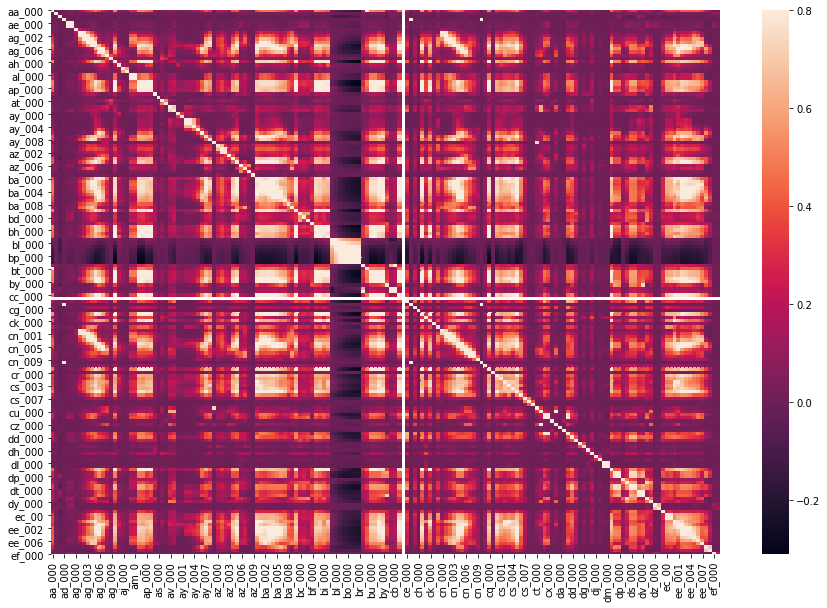

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = total_data.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corr_matrix, vmax = 0.8)
plt.show()

# (2)(b)(iv)

Picked the floor(√170) features with highest CV , and make scatter plots and box plots for them.

In [0]:
import math
import heapq
rt=np.floor(math.sqrt(len(total_data.columns)))
lst2.sort(reverse=True)
print(lst2[0:13])
coeff_variation.sort_values(by=0, ascending=False, axis=1)


[207.3345662014545, 206.9401876674696, 206.78544890713593, 192.4969278759478, 122.16919057935772, 113.89514985886927, 112.66584687227164, 111.27852632655134, 91.46491872031368, 86.08978020672754, 78.62359675762679, 78.00509186552081, 77.4607836658094]


,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009,ch_000,cs_008,dz_000,ay_001,ef_000,eg_000,aj_000,ag_001,ay_000,ay_002,dl_000,dk_000,dg_000,dm_000,ay_004,ea_000,ag_009,cn_009,ay_003,cy_000,cn_000,da_000,at_000,az_008,ae_000,dq_000,ai_000,...,cc_000,cs_005,bx_000,by_000,bb_000,bu_000,cq_000,bv_000,ci_000,ec_00,ag_006,cn_005,ah_000,bg_000,ds_000,ao_000,an_000,ed_000,ab_000,do_000,ce_000,ac_000,dt_000,cs_006,dp_000,cs_000,cv_000,dc_000,bs_000,cb_000,ca_000,bl_000,bk_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,cd_000
0,207.334566,206.940188,206.785449,192.496928,122.169191,113.89515,112.665847,111.278526,91.464919,86.08978,78.623597,78.005092,77.460784,57.495761,57.197612,49.252681,49.245071,47.924819,45.648216,43.144401,42.080063,40.89737,38.341236,37.455829,36.523845,34.667154,34.55205,33.040775,32.778335,32.166412,30.960721,28.329607,28.010552,27.973027,25.205086,23.187039,22.41537,22.293851,21.186092,18.506454,...,2.504509,2.5033,2.488153,2.442604,2.409934,2.408667,2.408667,2.408667,2.394096,2.378535,2.352567,2.337835,2.315522,2.313455,2.289939,2.276094,2.254216,2.250521,2.178383,2.1744,2.172575,2.167634,2.165066,2.099296,2.009299,1.972419,1.650197,1.621325,1.045713,0.903051,0.901153,0.732358,0.73016,0.594275,0.517625,0.462956,0.42698,0.400368,0.384002,0.0


Scatterplots for the floor(root(170)) features with highest CV

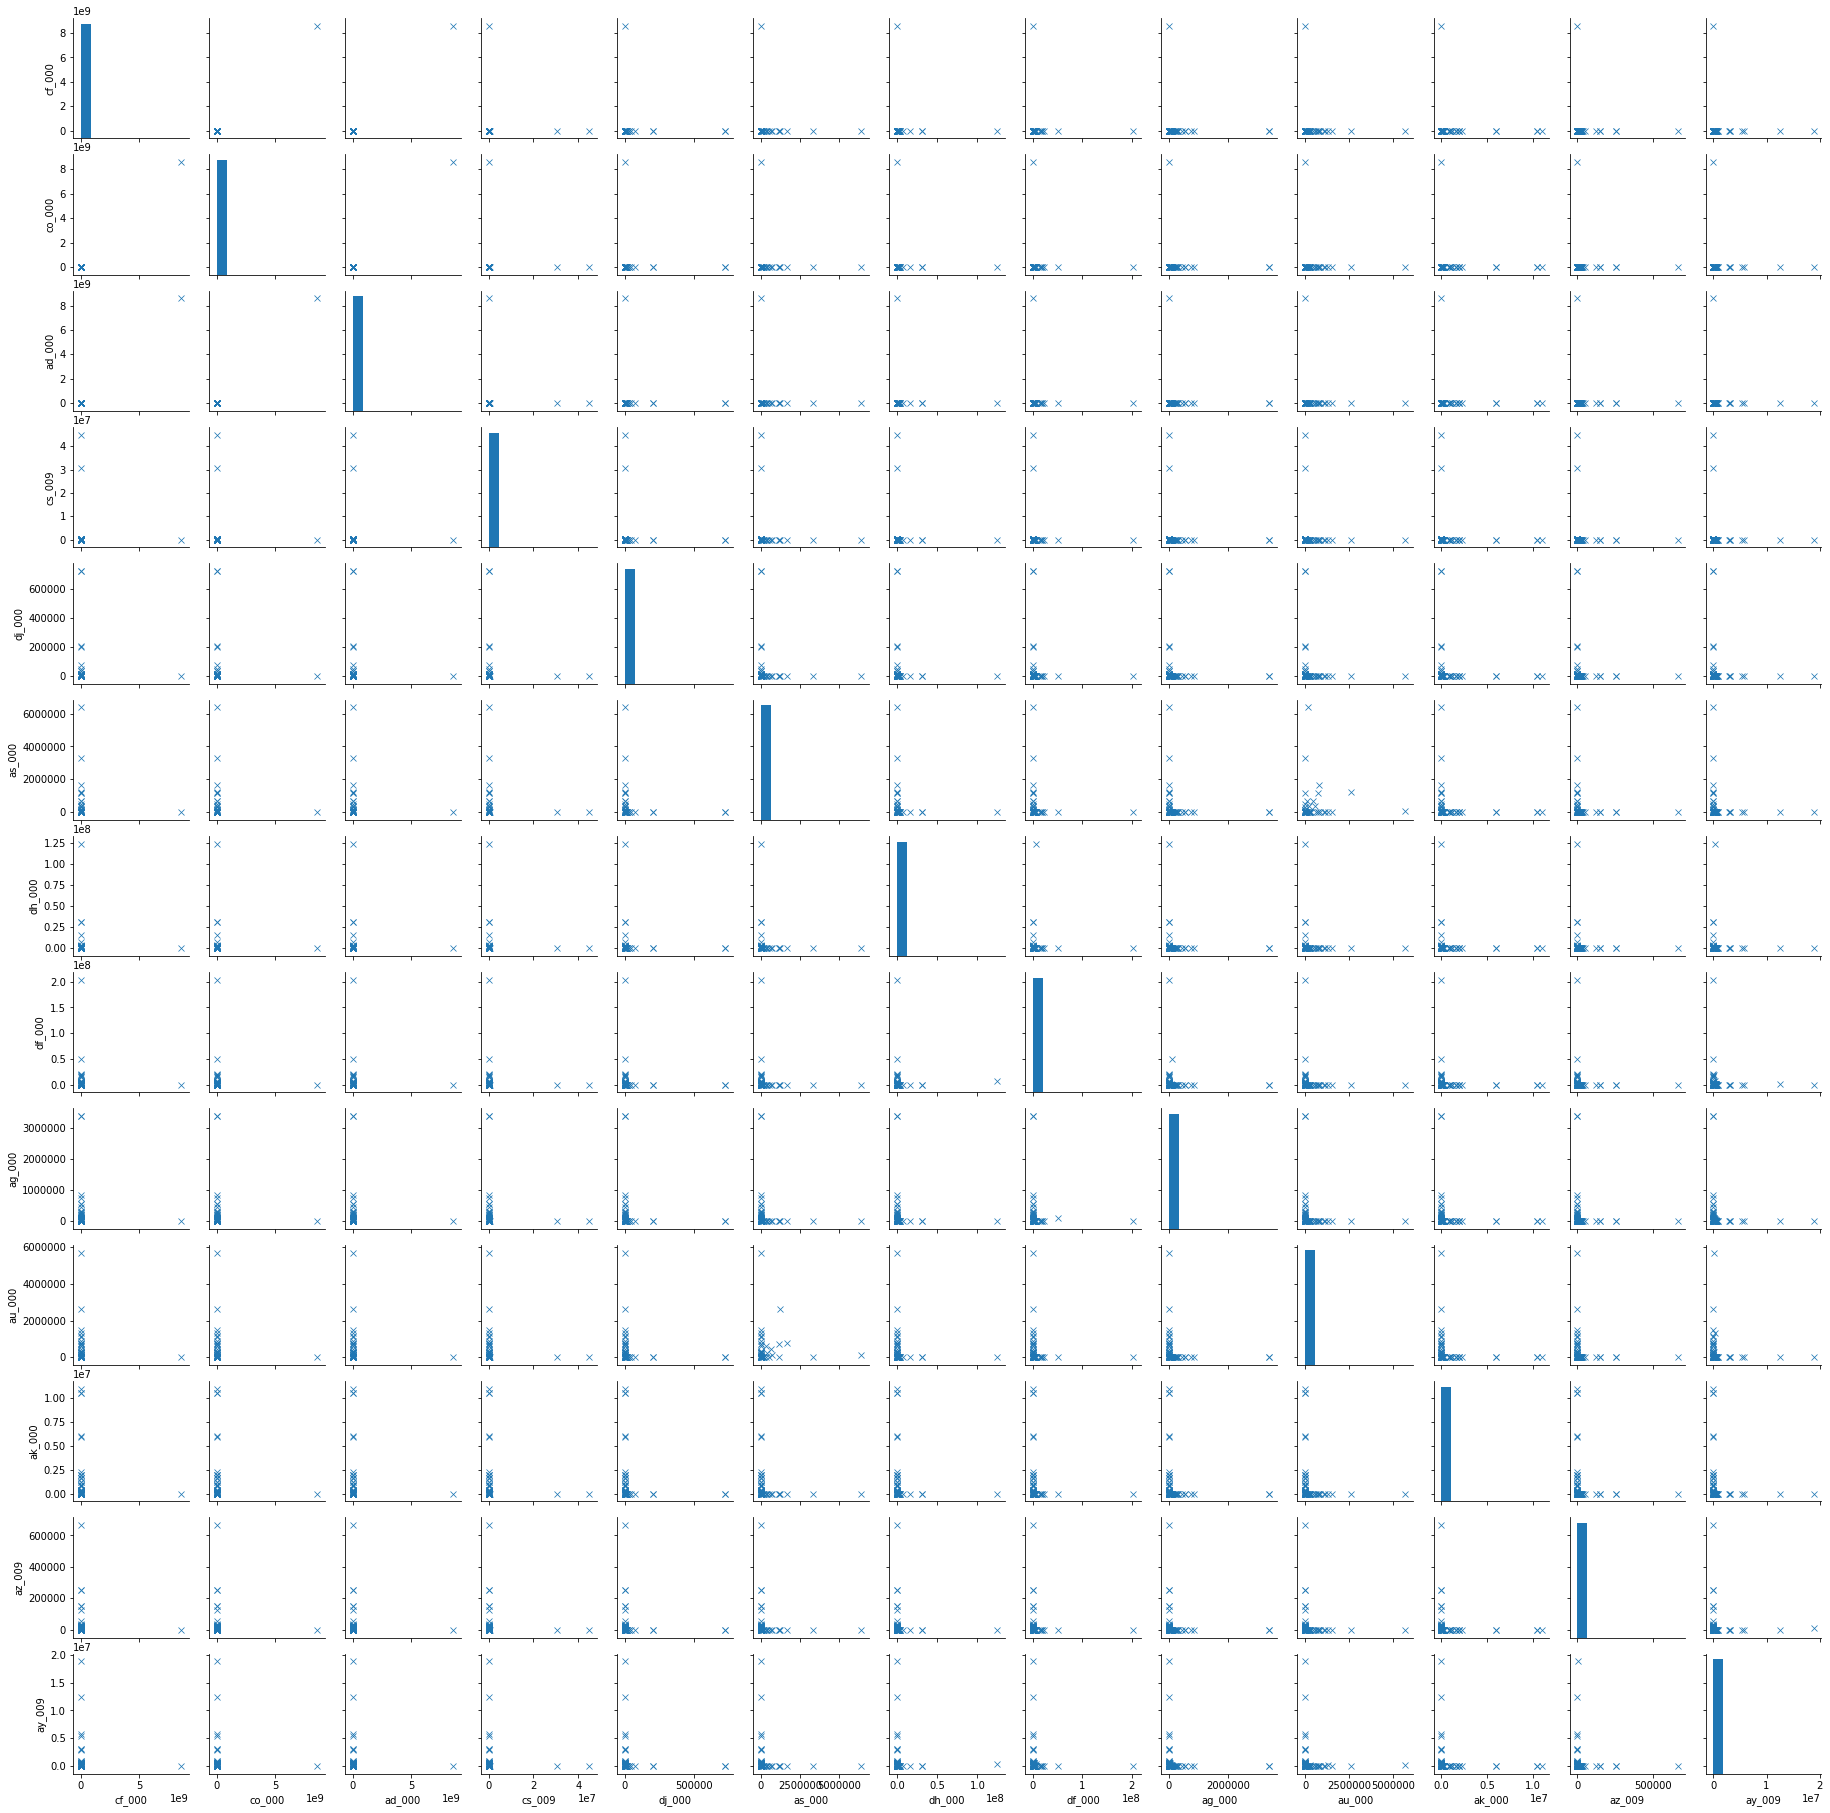

In [0]:
import seaborn as sns

cols=['cf_000','co_000','ad_000','cs_009','dj_000','as_000','dh_000','df_000','ag_000','au_000','ak_000','az_009','ay_009']
plot_cols=total_data[cols]
g=sns.pairplot(plot_cols,markers='x')
g.fig.set_size_inches(25,25)



Boxplots for the floor(root(170)) features with highest CV

In [0]:
col1=total_data['cf_000']	
col2=total_data['co_000']	
col3=total_data['ad_000']	
col4=total_data['cs_009']
col5=total_data['dj_000']
col6=total_data['as_000']
col7=total_data['dh_000']	
col8=total_data['df_000']	
col9=total_data['ag_000']	
col10=total_data['au_000']	
col11=total_data['ak_000']
col12=total_data['az_009']
col13=total_data['ay_009']

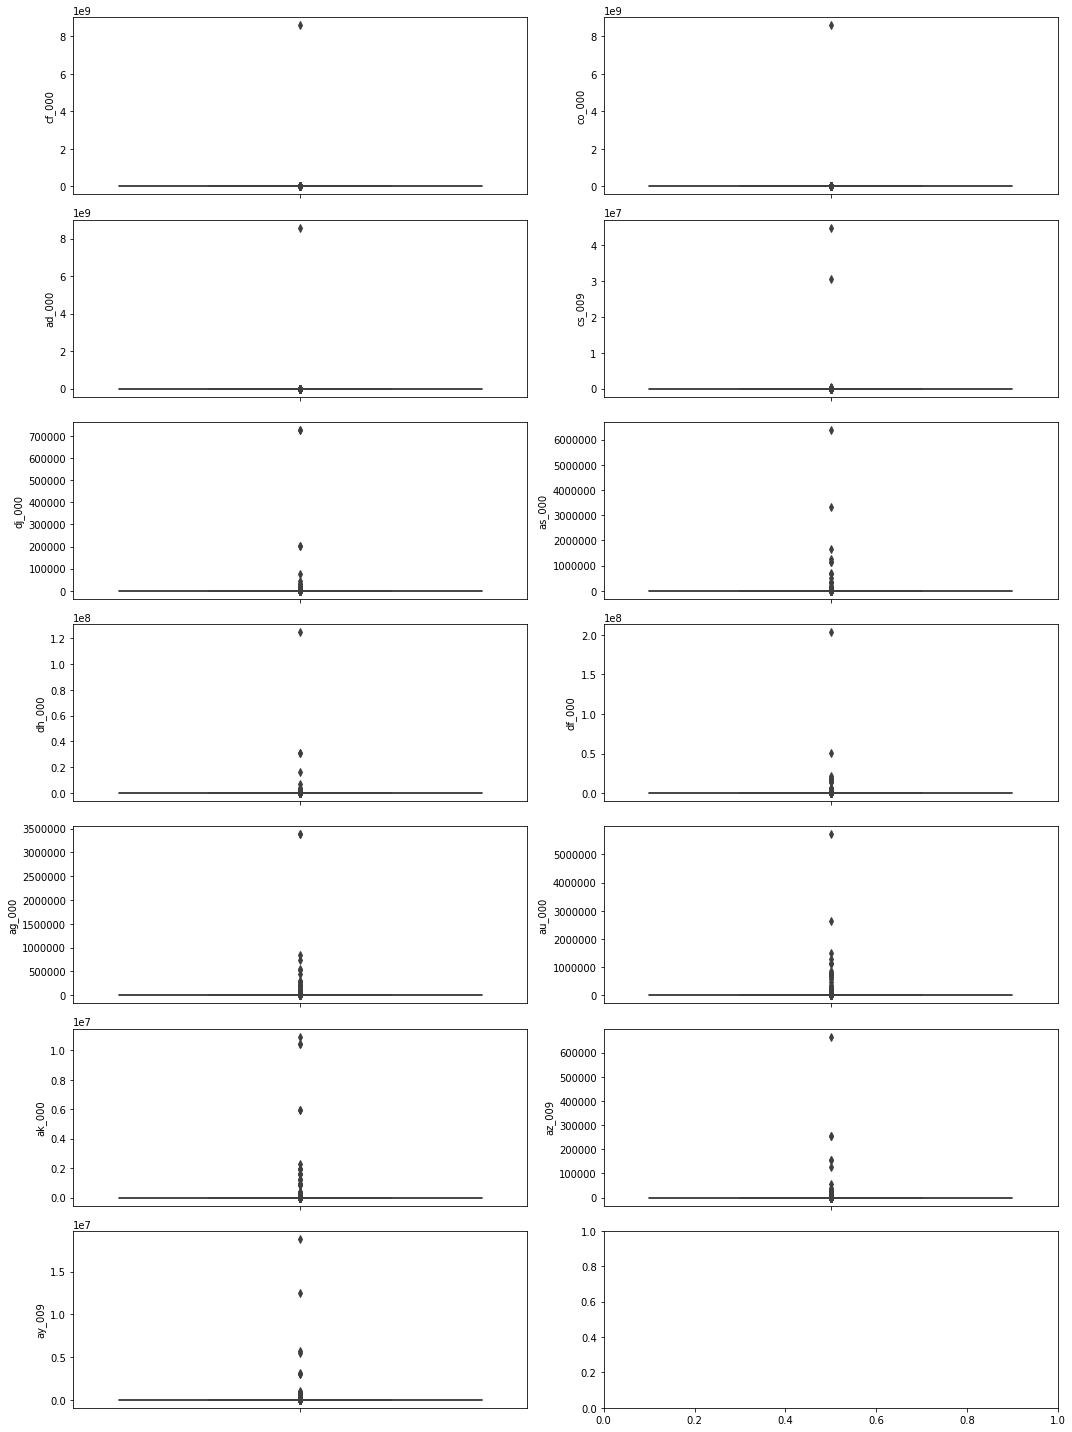

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

bx,bxplts  = plt.subplots(7, 2,sharex=False,sharey=False)

bxplts=bxplts.flatten()
bx1=sn.boxplot(y=col1,ax=bxplts[0])
bx2=sn.boxplot(y=col2,ax=bxplts[1])
bx3=sn.boxplot(y=col3,ax=bxplts[2])
bx4=sn.boxplot(y=col4,ax=bxplts[3])
bx5=sn.boxplot(y=col5,ax=bxplts[4])
bx6=sn.boxplot(y=col6,ax=bxplts[5])
bx7=sn.boxplot(y=col7,ax=bxplts[6])
bx8=sn.boxplot(y=col8,ax=bxplts[7])
bx9=sn.boxplot(y=col9,ax=bxplts[8])
bx10=sn.boxplot(y=col10,ax=bxplts[9])
bx11=sn.boxplot(y=col11,ax=bxplts[10])
bx12=sn.boxplot(y=col12,ax=bxplts[11])
bx13=sn.boxplot(y=col13,ax=bxplts[12])

bx.set_figheight(20)
bx.set_figwidth(15)

bx.tight_layout()

plt.show()

# (2)(b)(v)


Number of positive instances :1375 (training data + test data)  <br>
Number of negative instances :74625 (training data + test data)

In [0]:
total_data_y = pd.concat([train_df_y,test_df_y])
pos_class = total_data_y[total_data_y['class']==1]
neg_class = total_data_y[total_data_y['class']==0]

print(len(pos_class))
print(len(neg_class))

1375
74625


# (2)(c)

Fitting the Random forest with the training data that has class imbalance leaving the trees unpruned and without utilizing any early stopping criterion .

In [0]:
from sklearn.ensemble import RandomForestClassifier

mdl = RandomForestClassifier(n_estimators=100,oob_score =True)
mdl.fit(train_df_x, train_df_y)  



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

**Confusion matrix ,ROC curve , Area under curve ,training accuracy, training error and out of bag error for the random forest classifier on the training data :**

Confusion matrix :<br>

TP: 59000<br>
FP: 0<br>
FN:1<br>
TN:999 <br>

Train Accuracy:  0.9999833333333333 <br>
OOB score:  0.9941166666666666 <br>
Train error:  1.666666666666483e-05 <br>
Out of bag error estimate for training data:  0.0058833333333333515 <br>


Train Accuracy:  0.9999833333333333
OOB score:  0.9941166666666666
Train error:  1.666666666666483e-05
Out of bag error estimate for training data:  0.0058833333333333515
Confusion Matrix for training data:
 [[59000     0]
 [    1   999]]


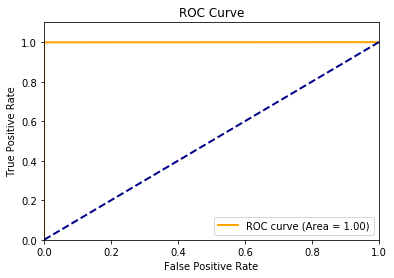

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score



preds=mdl.predict(train_df_x)
actual_y = train_df_y

confusion_mat = confusion_matrix(actual_y,preds)
accuracy=mdl.score(train_df_x,train_df_y)
oob_score = mdl.oob_score_
test_err = 1 - accuracy
oob_error = 1 - oob_score
print("Train Accuracy: ",accuracy)
print("OOB score: ",oob_score)
print("Train error: ",test_err)
print("Out of bag error estimate for training data: ",oob_error)
print("Confusion Matrix for training data:\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,preds)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()


**Confusion matrix ,ROC curve , Area under curve ,testing accuracy, testing error and out of bag error for the random forest classifier on the test data :**

Confusion matrix :<br>

TP: 15609<br>
FP: 16<br>
FN:103<br>
TN: 272 <br>

Test Accuracy:  0.9925625 <br>
OOB score:  0.9941166666666666 <br>
Test error:  0.007437499999999986 <br>
Out of bag error estimate:  0.0058833333333333515 <br>

Test Accuracy:  0.9925625
OOB score:  0.9941166666666666
Test error:  0.007437499999999986
Out of bag error estimate:  0.0058833333333333515
Confusion Matrix :
 [[15609    16]
 [  103   272]]


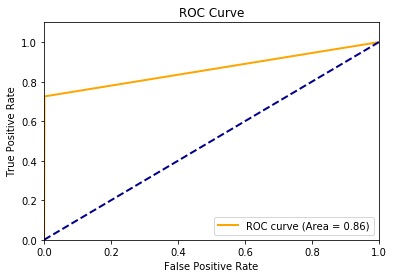

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score



preds=mdl.predict(test_df_x)
actual_y = test_df_y

confusion_mat = confusion_matrix(actual_y,preds)
accuracy=mdl.score(test_df_x,test_df_y)
oob_score = mdl.oob_score_
test_err = 1 - accuracy
oob_error = 1 - oob_score
print("Test Accuracy: ",accuracy)
print("OOB score: ",oob_score)
print("Test error: ",test_err)
print("Out of bag error estimate: ",oob_error)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,preds)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()



I have also tried out the random forest model on this imbalanced training data with an early stopping criterion to observe if the test performance improves but it actually drops even further when the classes are imbalanced .It could be that the random forest model on data with class imbalance requires it's individual trees to grow deeper in order to attain a better discriminative power with respect to both the classes as there arent so many instances of one of them 

The confusion matrix ,test accuracy, test error , OOB error, AUC score and ROC curve have been shown below  upon utilising stopping criterion of max_depth

In [0]:
from sklearn.ensemble import RandomForestClassifier

mdl = RandomForestClassifier(n_estimators=25,max_depth=5,oob_score =True)
mdl.fit(train_df_x, train_df_y)  



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

Test Accuracy:  0.98825
OOB score:  0.9903166666666666
Test error:  0.011750000000000038
Out of bag error estimate:  0.009683333333333377
Confusion Matrix :
 [[15611    14]
 [  174   201]]


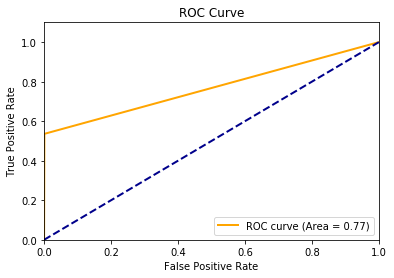

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score



preds=mdl.predict(test_df_x)
actual_y = test_df_y

confusion_mat = confusion_matrix(actual_y,preds)
accuracy=mdl.score(test_df_x,test_df_y)
oob_score = mdl.oob_score_
test_err = 1 - accuracy
oob_error = 1 - oob_score
print("Test Accuracy: ",accuracy)
print("OOB score: ",oob_score)
print("Test error: ",test_err)
print("Out of bag error estimate: ",oob_error)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,preds)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()



# (2)(d)

Fitting the Random forest with the training data whose classes are balanced and the trees are left unpruned without utilization of any early stopping criterion 

In [0]:
from sklearn.ensemble import RandomForestClassifier

mdl = RandomForestClassifier(n_estimators=100,oob_score =True,class_weight='balanced')
mdl.fit(train_df_x, train_df_y)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

Confusion matrix ,ROC curve , Area under curve ,training accuracy, training error and out of bag error for the random forest classifier on the training data :

Confusion matrix :

TP: 59000<br>
FP: 0<br>
FN:0<br>
TN:1000 <br>

Train Accuracy:  1.0<br>
OOB score:  0.9922333333333333 <br>
Train error:  0.0 <br>
Out of bag error estimate training data:  0.0077666666666666995 <br>

Train Accuracy:  1.0
OOB score:  0.9922333333333333
Train error:  0.0
Out of bag error estimate training data:  0.0077666666666666995
Confusion Matrix training data:
 [[59000     0]
 [    0  1000]]


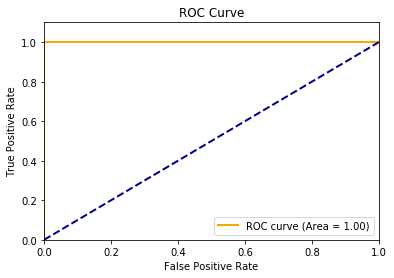

In [0]:
preds=mdl.predict(train_df_x)
actual_y = train_df_y

confusion_mat = confusion_matrix(actual_y,preds)
accuracy=mdl.score(train_df_x,train_df_y)
oob_score = mdl.oob_score_
test_err = 1 - accuracy
oob_error = 1 - oob_score
print("Train Accuracy: ",accuracy)
print("OOB score: ",oob_score)
print("Train error: ",test_err)
print("Out of bag error estimate training data: ",oob_error)
print("Confusion Matrix training data:\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,preds)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Confusion matrix ,ROC curve , Area under curve ,test accuracy, test error and out of bag error for the random forest classifier on the test data :

Confusion matrix :

TP: 15612<br>
FP: 13<br>
FN:164<br>
TN:211 <br>

Test Accuracy:  0.9889375<br>
OOB score:  0.9922333333333333<br>
Test error:  0.011062499999999975<br>
Out of bag error estimate:  0.0077666666666666995<br>

Test Accuracy:  0.9889375
OOB score:  0.9922333333333333
Test error:  0.011062499999999975
Out of bag error estimate:  0.0077666666666666995
Confusion Matrix :
 [[15612    13]
 [  164   211]]


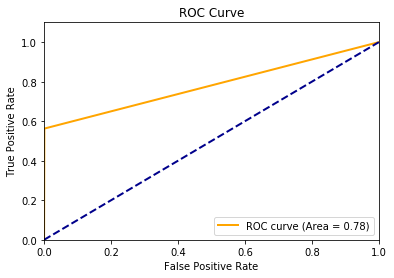

In [0]:
preds=mdl.predict(test_df_x)
actual_y = test_df_y

confusion_mat = confusion_matrix(actual_y,preds)
accuracy=mdl.score(test_df_x,test_df_y)
oob_score = mdl.oob_score_
test_err = 1 - accuracy
oob_error = 1 - oob_score
print("Test Accuracy: ",accuracy)
print("OOB score: ",oob_score)
print("Test error: ",test_err)
print("Out of bag error estimate: ",oob_error)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,preds)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

I have also tried out the random forest model on this class weight balanced training data with an early stopping criterion to observe if the test performance improves and I observed a significant improvement in performance on the test data .It could be that the random forest model that deals with balanced data doesn't require the individual trees to grow deeper as sufficient discriminative power is achieved with just a few splits due to availability of instances under both the classes 

The confusion matrix ,test accuracy, test error , OOB error, AUC score and ROC curve have been shown below  upon utilising stopping criterion of max_depth

In [0]:
from sklearn.ensemble import RandomForestClassifier

mdl = RandomForestClassifier(n_estimators=25,max_depth=5,oob_score =True,class_weight='balanced')
mdl.fit(train_df_x, train_df_y)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=25, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

Test Accuracy:  0.9594375
OOB score:  0.9567
Test error:  0.040562499999999946
Out of bag error estimate:  0.043300000000000005
Confusion Matrix :
 [[14991   634]
 [   15   360]]


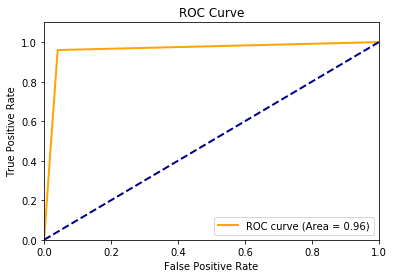

In [0]:
preds=mdl.predict(test_df_x)
actual_y = test_df_y

confusion_mat = confusion_matrix(actual_y,preds)
accuracy=mdl.score(test_df_x,test_df_y)
oob_score = mdl.oob_score_
test_err = 1 - accuracy
oob_error = 1 - oob_score
print("Test Accuracy: ",accuracy)
print("OOB score: ",oob_score)
print("Test error: ",test_err)
print("Out of bag error estimate: ",oob_error)
print("Confusion Matrix :\n",confusion_mat)
false_positive_rate, true_positive_rate, _ = roc_curve(actual_y,preds)
area_under_curve = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, color='orange',lw=2, label='ROC curve (Area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc="lower right")
plt.show()

Installation of Javabridge and the weka wrapper for python 3

In [0]:
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"
!apt-get install build-essential python3-dev
!apt-get install python3-pil python3-pygraphviz
!apt install openjdk-11-jdk
!pip3 install javabridge --no-cache-dir
!pip3 install python-weka-wrapper3 --no-cache-dir

import weka.core.jvm as jvm
jvm.start()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3-olefile
Suggested packages:
  python-pil-doc python3-pil-dbg python-pygraphviz-doc
The following NEW packages will be installed:
  python3-olefile python3-pil python3-pygraphviz
0 upgraded, 3 newly installed, 0 to remove and 28 not upgraded.
Need to get 433 kB of archives.
After this operation, 1,954 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-olefile all 0.45.1-1 [33.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pil amd64 5.1.0-1 [328 kB]
Get:3 http://archive.ubuntu.c

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.6/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [0]:
train_total = pd.concat([train_df_x,train_df_y],axis=1)

train_total['class'] = train_total['class'].map({1.0: 'pos', 0.0: 'neg'})

# (2)(e)

Linear Model tree classifier available in the weka.classifiers library is utilised in order to perform the classification task  on the imbalanced training data<br>

Converted the imbalanced training dataframe to a csv file and loaded the file back to the colab runtime. 


In [0]:
import weka.core.jvm as jvm 
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls



train_total.to_csv('/gdrive/My Drive/Homeworks/df_imbalanced_train.csv',sep=',',index=False)
train_total = convert.load_any_file(filename='/gdrive/My Drive/Homeworks/df_imbalanced_train.csv')

Performed 5 fold cross validation for the linear model tree classifier in order to compute the cross validation error .

The CV error and confusion matrix obtained upon this evaluation has been shown below :

In [0]:
train_total.class_is_last()
mdl=Classifier(classname="weka.classifiers.trees.LMT")
evaluate = Evaluation(train_total)
evaluate.crossvalidate_model(classifier=mdl,data=train_total,num_folds=5,rnd=Random(0))
print("CV Error = %.1f%%" % (evaluate.percent_incorrect))
print(evaluate.matrix())




CV Error = 0.8%
=== Confusion Matrix ===

     a     b   <-- classified as
 58813   187 |     a = neg
   306   694 |     b = pos



Built the classifier by fitting the training data .

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics

mdl1 = Classifier.make_copy(mdl)
mdl1.build_classifier(train_total)
predict_y = evaluate.test_model(mdl1,train_total)



ROC curve and AUC score for the imbalanced training data upon utilising the linear model tree classifier in order to generate predictions for the output label of the training data and comparing it with the true output label of the training data which is already known to us  

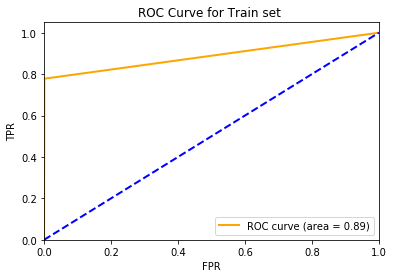

In [0]:
actual_y = train_df_y
fpr, tpr, _ = roc_curve(actual_y,predict_y)
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Train set ')
plt.legend(loc="lower right")
plt.show()

Converted the pos and neg classes encoded as 1 and 0 back to their textual form since test_model( ) in weka requires them to be a non numeric attribute

In [0]:
test_total = pd.concat([test_df_x,test_df_y],axis=1)

test_total['class'] = test_total['class'].map({1.0: 'pos', 0.0: 'neg'})

Converted the imbalanced test dataframe to a csv file and loaded the file back to the colab runtime. 

In [0]:
test_total.to_csv('/gdrive/My Drive/Homeworks/df_imbalanced_test.csv',sep=',',index=False)
test_total = convert.load_any_file(filename='/gdrive/My Drive/Homeworks/df_imbalanced_test.csv')


Computed the test error and confusion matrix upon generating predictions from the linear model tree classifier on the test data.

In [0]:
test_total.class_is_last()
evaluate = Evaluation(test_total)
test_preds=evaluate.test_model(mdl1,test_total)
print("Test Error = %.1f%%" % (evaluate.percent_incorrect))
print(evaluate.matrix())

Test Error = 1.0%
=== Confusion Matrix ===

     a     b   <-- classified as
 15579    46 |     a = neg
   108   267 |     b = pos



ROC curve and AUC score for the imbalanced data upon utilising the linear model tree classifier in order to generate predictions for the output label of the test data and comparing it with the true output label of the test data 

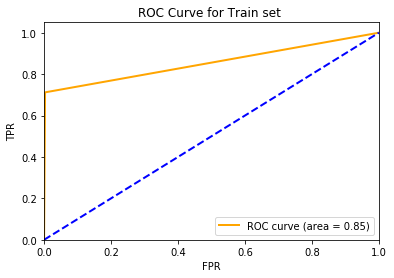

In [0]:
actual_y_test = test_df_y
fpr, tpr, _ = roc_curve(actual_y_test,test_preds)
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Train set ')
plt.legend(loc="lower right")
plt.show()

# (2)(f)

Building a linear model tree classifier using the weka wrapper for python in order to fit the training data that has been balanced using SMOTE

In [0]:
from imblearn.over_sampling import SMOTE
import pandas as pd

sampling = SMOTE(random_state=0,ratio=1)
smote_sampler=sampling.fit_sample(train_df_x,train_df_y)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Utilised synthetic minority oversampling technique (SMOTE) in order to eradicate the class imbalance in the training data and generate balanced training data with equivalent class labels for each class 

In [0]:
smote_sampler_x=pd.DataFrame(smote_sampler[0],columns=train_df_x.columns)
smote_sampler_y=pd.DataFrame(smote_sampler[1],columns=train_df_y.columns)
smote_sampler_total = pd.concat([smote_sampler_x,smote_sampler_y],axis=1)

In [0]:
print("After smote balancing\n 1.0 represents positive class and 0.0 represents negative class\n")
smote_sampler_total['class'].value_counts()

After smote balancing
 1.0 represents positive class and 0.0 represents negative class



1.0    59000
0.0    59000
Name: class, dtype: int64

In [0]:
smote_sampler_total['class'] = smote_sampler_total['class'].map({1.0: 'pos', 0.0: 'neg'})

Converted the balanced training dataframe to a csv file and loaded the file back to the colab runtime. 

In [0]:
smote_sampler_total.to_csv('/gdrive/My Drive/Homeworks/df_smote_train.csv',sep=',',index=False)
smote_sampler_total = convert.load_any_file(filename='/gdrive/My Drive/Homeworks/df_smote_train.csv')


In [0]:
import weka.core.jvm as jvm 
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls



Performed 5 fold cross validation for the linear model tree classifier in order to compute the cross validation error .

The CV error and confusion matrix obtained upon this evaluation has been shown below 

In [0]:
smote_sampler_total.class_is_last()
mdl=Classifier(classname="weka.classifiers.trees.LMT")
evaluate = Evaluation(smote_sampler_total)
evaluate.crossvalidate_model(classifier=mdl,data=smote_sampler_total,num_folds=5,rnd=Random(0))

In [0]:
print("CV Error = %.1f%%" % (evaluate.percent_incorrect))
print(evaluate.matrix())

CV Error = 1.5%
=== Confusion Matrix ===

     a     b   <-- classified as
 57997  1003 |     a = neg
   733 58267 |     b = pos



Built the classifier by fitting the training data .

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics

mdl1 = Classifier.make_copy(mdl)
mdl1.build_classifier(smote_sampler_total)
predict_y = evaluate.test_model(mdl1,smote_sampler_total)


ROC curve and AUC score for the balanced training data upon utilising the linear model tree classifier in order to generate predictions for the output label of the training data and comparing it with the true output label of the training data which is already known to us  

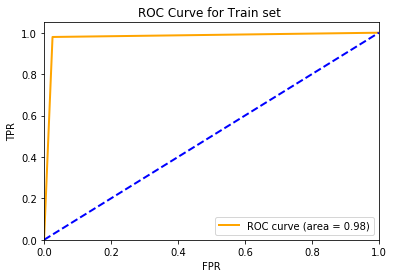

In [0]:
actual_y = smote_sampler_y
fpr, tpr, _ = roc_curve(actual_y,predict_y)
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Train set ')
plt.legend(loc="lower right")
plt.show()

Computed the test error and confusion matrix upon generating predictions from the linear model tree classifier on the test data. <br>
The test error and confusion matrix obtained as a result of the same has been shown below

In [0]:
test_total.class_is_last()
evaluate = Evaluation(test_total)
test_preds=evaluate.test_model(mdl1,test_total)
print("Test Error = %.1f%%" % (evaluate.percent_incorrect))
print(evaluate.matrix())

Test Error = 2.7%
=== Confusion Matrix ===

     a     b   <-- classified as
 15225   400 |     a = neg
    35   340 |     b = pos



ROC curve and AUC score for the balanced data upon utilising the linear model tree classifier in order to generate predictions for the output label of the test data and comparing it with the true output label of the test data

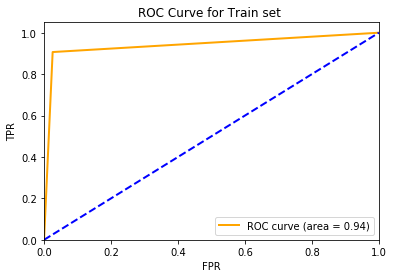

In [0]:
actual_y_test = test_df_y
fpr, tpr, _ = roc_curve(actual_y_test,test_preds)
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Train set ')
plt.legend(loc="lower right")
plt.show()

The observation made upon comparing the results of (2)(e) and (2)(f) is that the linear model tree performance improves upon removing the class imbalance between the pos and neg label instances through synthetic minority oversampling technique(SMOTE)

**Refer the attached pdf document in the zip file in order to view the solutions to the ISLR problems of this homework**